In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 3788741
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g, load_360=True)

teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())

df_shots = df_events[df_events["type_name"] == "Shot"].reset_index(drop=True)

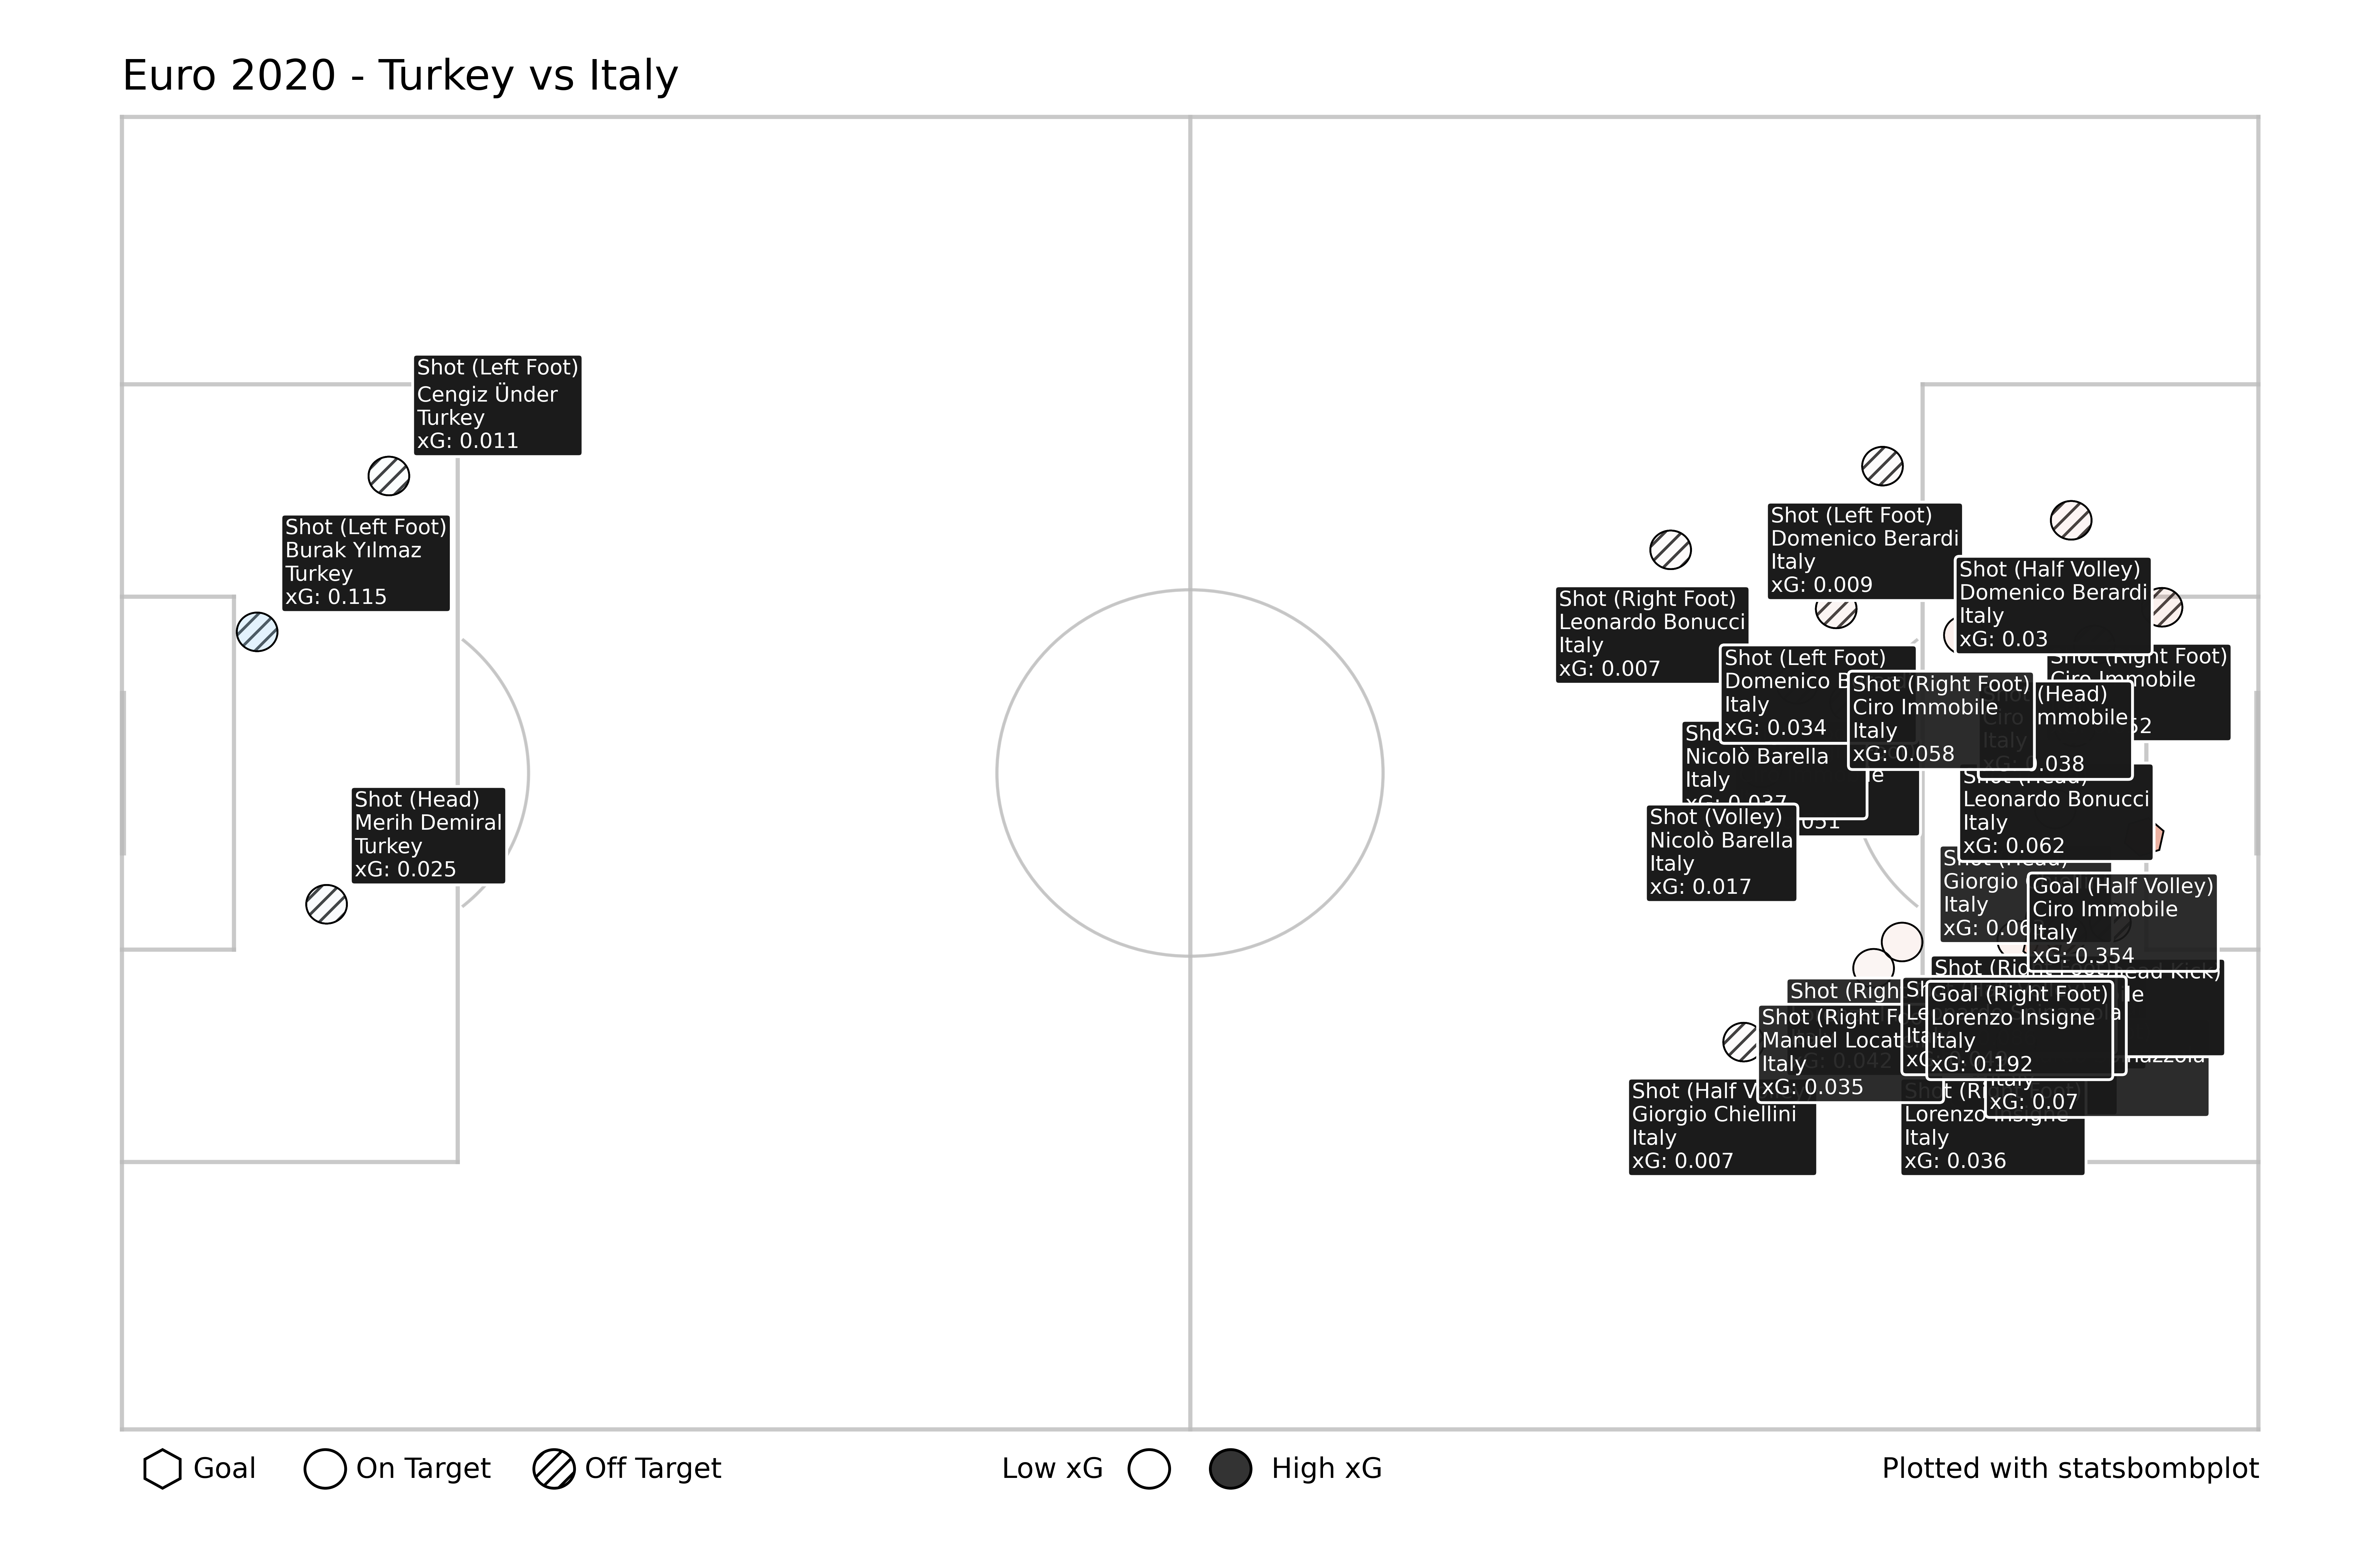

In [3]:
import statsbombplot as sbp

sbp.events.draw_shotmap(df_shots, "shotmap_test", teams_id[0], f'Euro 2020 - {teams[0]} vs {teams[1]}')
